In [52]:
# Import required libraries

# To serializer model
import pickle
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data processing and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns

# ML libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Data downloaded from: https://www.kaggle.com/bhavikbb/password-strength-classifier-dataset
data = pd.read_csv("data/data.csv", error_bad_lines=False)
# Without error_bad_lines parameter it is giving error, as some lines are not fine
# So to skip those rows we can use this

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
print("Shape of data: {}".format(data.shape))
data.head(10)

Shape of data: (669640, 2)


,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


In [4]:
# To get info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669640 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [5]:
# Check distinct values of strength
data.strength.unique()

array([1, 2, 0])

As mentioned in dataset description:
#### 0 means weak password
#### 1 means medium password
#### 2 means strong password

In [6]:
# To check whether null values are present in dataset or not
data.isnull().sum()

password    1
strength    0
dtype: int64

In [7]:
# It means 1 null value in password
data[data["password"].isnull()]
# We will drop this value

,password,strength
367579,NaN,0


In [8]:
data.dropna(inplace=True)
data.isnull().sum()
# Now we don't have any null values

password    0
strength    0
dtype: int64

In [9]:
# Check if duplicate password are there
data[data.duplicated(['password'])]
# As we can see there are no duplicates

,password,strength


<AxesSubplot:xlabel='strength', ylabel='count'>

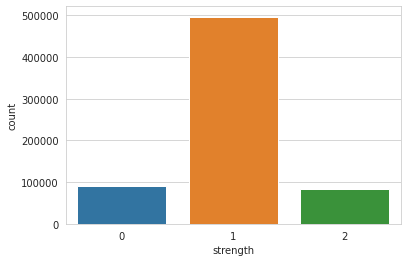

In [10]:
# Using countplot
sns.set_style('whitegrid') # Seaborn has five built-in themes to style its plots: darkgrid, whitegrid, dark, white, and ticks
sns.countplot(x ='strength', data = data)

In [11]:
# Convert dataset to array
password_array = np.array(data)
password_array

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [12]:
password_array.shape

(669639, 2)

## Now we need to shuffle the data because:
* Shuffling data serves the purpose of reducing variance and making sure that models remain general and overfit less.
* For best accuracy of the model, it's always recommended that training data should have all flavours of data. Shuffling of training data helps us in achieving this target.

When we use this python in build `random` function with numpy arrays, it gives duplicate data

`
import random
random.shuffle(password_array)
`

* Refer this: https://stackoverflow.com/questions/976882/shuffling-a-list-of-objects#answer-41227542
* It is tested with this data also, we are getting duplicate values


Instead of this we can either use shuffle from sklearn or we can use numpy.random.shuffle, here we will be using `numpy.random.shuffle`

In [13]:
np.random.shuffle(password_array)
password_array

array([['gi2xoBDI4NQkWLPd', 2],
       ['zetrox86', 1],
       ['efdqtsam90', 1],
       ...,
       ['a0115644146', 1],
       ['jimenez123456', 1],
       ['televyn739', 1]], dtype=object)

In [14]:
# Divide data into independent and dependent feature
X = [password[0] for password in password_array]
y = [label[1] for label in password_array]

In [15]:
X[:10]

['gi2xoBDI4NQkWLPd',
 'zetrox86',
 'efdqtsam90',
 'razors666',
 'jep1ce',
 '9acf876cd4',
 'chucho2',
 'tube4asian',
 'npkdcyt38',
 'fydyv435']

In [16]:
y[:10]

[2, 1, 1, 1, 0, 1, 0, 1, 1, 1]

In [17]:
# We are creating a function which will return letters of all password in a list
def words_to_char(password):
    characters = []
    for letter in password:
        characters.append(letter)
    return characters

# For example:
words_to_char("enigma")

['e', 'n', 'i', 'g', 'm', 'a']

In [18]:
# We will now create object of TfidfVectorizer
# We are passing this function which will tell how to tokenize your string or corpus
vectorizer = TfidfVectorizer(tokenizer=words_to_char)
X = vectorizer.fit_transform(X)

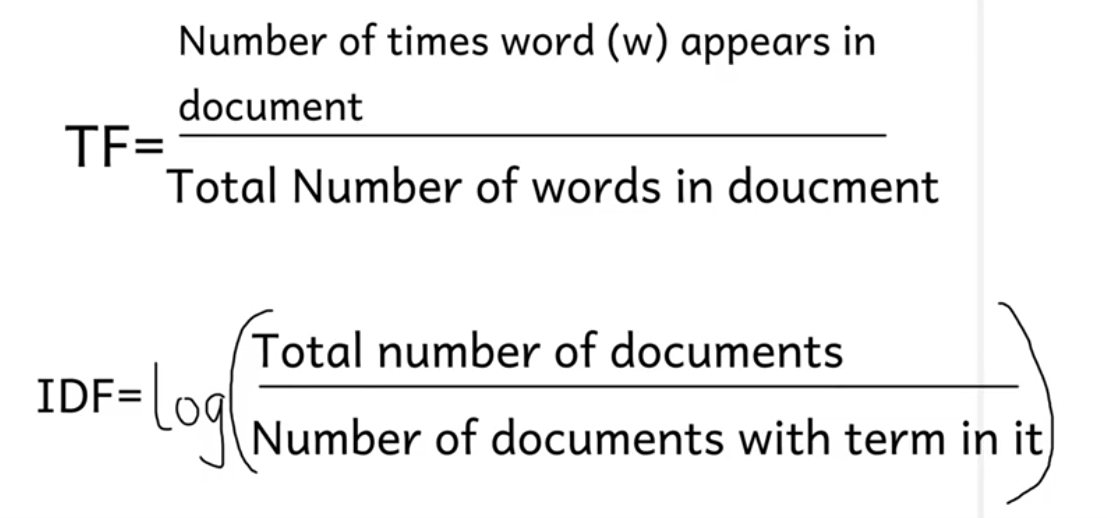


* **Then we multiply TF and IDF to get TFIDF**
* **Here we get important words in a document and then we can know what document is about**
* **In our case, we won't be having words, we will use characters(as password is collection of characters), that's why we are using tokenizer as `words_to_char` function**

In [20]:
X.shape

(669639, 153)

In [25]:
# # The attribute vocabulary_ outputs a dictionary in which all ngrams are the dictionary keys and the respective values are the column positions of each ngram (feature) in the tfidf matrix
vectorizer.vocabulary_
# # Refer: https://stackoverflow.com/questions/54335229/difference-between-vocabulary-and-get-features-of-tfidfvectorizer

{'g': 62,
 'i': 64,
 '2': 36,
 'x': 79,
 'o': 70,
 'b': 57,
 'd': 59,
 '4': 38,
 'n': 69,
 'q': 72,
 'k': 66,
 'w': 78,
 'l': 67,
 'p': 71,
 'z': 81,
 'e': 60,
 't': 75,
 'r': 73,
 '8': 42,
 '6': 40,
 'f': 61,
 's': 74,
 'a': 56,
 'm': 68,
 '9': 43,
 '0': 34,
 'j': 65,
 '1': 35,
 'c': 58,
 '7': 41,
 'h': 63,
 'u': 76,
 'y': 80,
 '3': 37,
 'v': 77,
 '5': 39,
 '.': 32,
 '-': 31,
 '@': 49,
 '*': 29,
 '_': 54,
 '$': 24,
 '!': 21,
 '%': 25,
 '#': 23,
 ' ': 20,
 ')': 28,
 '/': 33,
 ';': 44,
 '?': 48,
 '<': 45,
 '>': 47,
 '+': 30,
 '[': 50,
 '|': 83,
 ']': 52,
 '&': 26,
 '=': 46,
 '÷': 136,
 '(': 27,
 '{': 82,
 '~': 85,
 '}': 84,
 '^': 53,
 '±': 99,
 'ä': 119,
 'æ': 121,
 'â': 117,
 '—': 146,
 '¿': 112,
 '"': 22,
 '³': 101,
 'þ': 142,
 '\x17': 13,
 '\x8d': 88,
 '\x06': 4,
 '¼': 109,
 'ó': 132,
 '\\': 51,
 '¹': 106,
 '°': 98,
 '´': 102,
 '¶': 104,
 'ú': 138,
 'ü': 140,
 'ô': 133,
 '\x10': 8,
 '\x1c': 17,
 '\x19': 15,
 'ñ': 130,
 '\x81': 87,
 'ð': 129,
 'º': 107,
 '¾': 111,
 '`': 55,
 'ß': 114,

In [32]:
# To get feature names
feature_names = vectorizer.get_feature_names()

# To get tfidf vector for first document
first_doc_vector = X[0].T.todense()
# Now to convert it into dataframe to print scores
temp_df = pd.DataFrame(first_val, index=feature_names, columns=["tfidf_value"]).sort_values(by=['tfidf_value'], ascending=False)
# We used sort_values so we could get some greater than 0 value in initial rows
temp_df

,tfidf_value
d,0.452850
i,0.362873
x,0.284739
q,0.283737
w,0.259914
...,...
8,0.000000
7,0.000000
6,0.000000
5,0.000000


In [35]:
# Now we will split our data into training and testing for model training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=7)
X_train.shape, X_test.shape

((508925, 153), (160714, 153))

In [42]:
# We will be using multiple algorithms and choosing best one based on model metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

final_scores = {}

In [44]:
# Using logistic regression OVR
log_reg_ovr = LogisticRegression(multi_class='ovr') # ovr: One vs Rest
out = log_reg_ovr.fit(X_train, y_train)
final_scores["log_reg_ovr"] = out.score(X_test, y_test)

# Using logistic regression multinomial
log_reg_mn = LogisticRegression(multi_class='multinomial', solver='saga') # ovr: One vs Rest
out = log_reg_mn.fit(X_train, y_train)
final_scores["log_reg_mn"] = out.score(X_test, y_test)

# Using XGBoost
xgb_cls = xgb.XGBClassifier()
out = xgb_cls.fit(X_train, y_train)
final_scores["xgb"] = out.score(X_test, y_test)

# Using multinomial naive bayes
nb_cls = MultinomialNB()
out = nb_cls.fit(X_train, y_train)
final_scores["nb"] = out.score(X_test, y_test)

final_scores

[13:23:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'log_reg_ovr': 0.812380999788444,
 'log_reg_mn': 0.8189579003696007,
 'xgb': 0.9800452978583073,
 'nb': 0.7438244334656595}

**We can see we are getting best score in XGBoost, so we will be choosing this algorithm**

In [45]:
xgb_cls.fit(X_train, y_train)
pred = xgb_cls.predict(X_test)
pred

[13:30:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([2, 0, 1, ..., 0, 1, 1])

In [47]:
confusion_matrix(y_test, pred)

array([[ 20073,   1379,      0],
       [   736, 118286,    323],
       [     1,    768,  19148]])

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     21452
           1       0.98      0.99      0.99    119345
           2       0.98      0.96      0.97     19917

    accuracy                           0.98    160714
   macro avg       0.98      0.96      0.97    160714
weighted avg       0.98      0.98      0.98    160714



**We can see we have got good accuracy, precision and recall for test data**


We will save this model so we can use it in our application, where user will enter a random password and we will predict is it strong or not

In [54]:
# Saving the XGBoost trained model to file in the current working directory
with open("xgb_classifier.pkl", "wb") as file:  
    pickle.dump(xgb_cls, file)

# Saving our TFIDF vectorizer too
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)